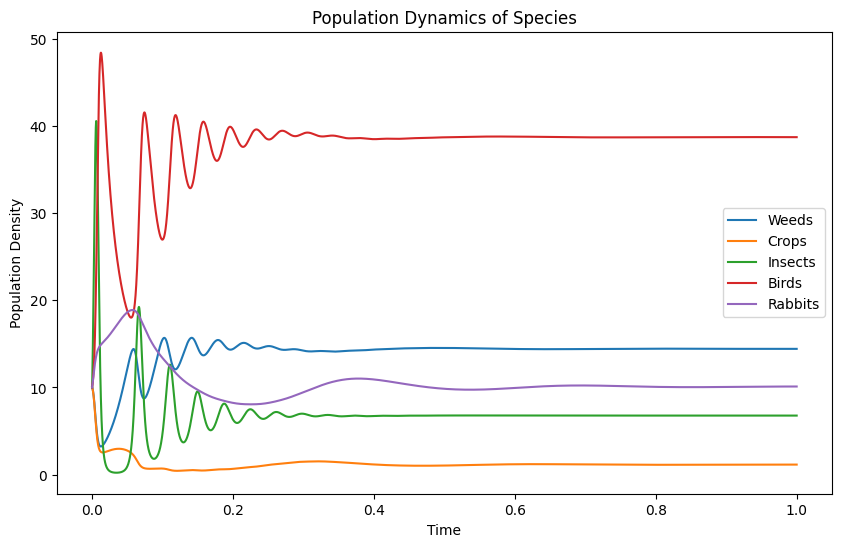

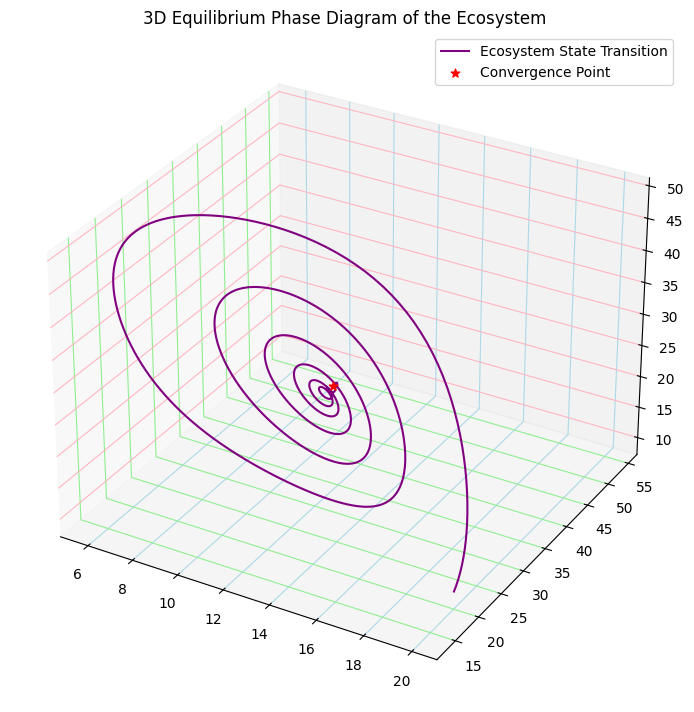

In [79]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define the number of species
m = 5

Species_names = [ 'Weeds','Crops', 'Insects', 'Birds', 'Rabbits']

# Define the interaction matrix A (m x m) with predefined values
A = 10*np.array([[-0.1       , -0.1     , -0.5      , 0         , 0         ], #crop
              [-0.1       , -0.1      ,-0.5      , 0         , -0.5      ], # weeds
              [2.5        , 2.5        , -0.1       , -1       , 0         ], #insects
              [0          , 0         , 0.6      , -0.1       , 0         ],  #birds
              [0         , 0.8       , 0        , 0          , -0.1       ]])  #rabbits

# Define the initial population vector N0 (m-dimensional)
N0 = np.array([10,10,10,10,10])

# Define the intrinsic growth rates vector r (m-dimensional)
r = 10*np.array([5, 10, 0.5, 0.2, 0.2])

# Define the carrying capacities vector K (m-dimensional)
K = np.array([1200, 600,  300, 20, 20])

# Define the time points where solution is computed
t = np.linspace(0, 1, 5000)

# Define the differential equation
def dN_dt(N, t, r, K, A):
    N = np.array(N)
    dN = r * N * (1 - N / K) + np.dot(A * np.outer(N, N.T), np.ones(m))
    return dN

# Solve the differential equation
solution = odeint(dN_dt, N0, t, args=(r, K, A))

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(m):
    plt.plot(t, solution[:, i], label=Species_names[i])
plt.xlabel('Time')
plt.ylabel('Population Density')
plt.title('Population Dynamics of Species')
plt.legend()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot with a larger figure size
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory of the ecosystem state transitions
ax.plot(solution[:, 0]+solution[:,1], solution[:, 2]+solution[:, 4], solution[:, 3], color='purple', label='Ecosystem State Transition')

# Plot the convergence point
convergence_point = [solution[-1, 0]+solution[-1,1], solution[-1, 2]+solution[-1,4], solution[-1, 3]]
ax.scatter(convergence_point[0], convergence_point[1], convergence_point[2], color='red', marker='*', s=40, label='Convergence Point')

# Set labels
# ax.set_xlabel('Species 1 Population')
# ax.set_ylabel('Species 2 Population')
# ax.set_zlabel('Species 3 Population')
ax.set_title('3D Equilibrium Phase Diagram of the Ecosystem')

# Change the background grid color for each axis
ax.xaxis._axinfo['grid'].update(color='lightblue')
ax.yaxis._axinfo['grid'].update(color='lightgreen')
ax.zaxis._axinfo['grid'].update(color='lightpink')

# Add legend
ax.legend()
plt.tight_layout()

# Show plot
plt.show()



In [80]:
# Define the number of species
m = 10

A0_array = [0.5]

Species_name = ['crop', 'weeds', 'insects', 'birds', 'rabbits', 'mouse', 'frog', 'mantis', 'snake', 'bat']

fluctuation_rates = []
crop_fluctuation_rates = []

for A0 in A0_array:
    # Define the interaction matrix A (m x m) with predefined values
    # A = A0 * np.array([
    #     [-0.1, -0.1, -0.5, 0, 0, -0.8, 0, 0, 0, 0.5],  # crop
    #     [-0.1, -0.1, -0.5, 0, -0.5, 0, 0, 0, 0, 0],  # weeds
    #     [2.5, 2.5, -0.1, -1, 0, 0, -1, -1, 0, -1],  # insects
    #     [0, 0, 0.6, -0.1, 0, 0, 0, 0.6, -0.2, 0],  # birds
    #     [0, 0.8, 0, 0, -0.1, 0, 0, 0, 0, 0],  # rabbits
    #     [4, 0, 0, 0, 0, -0.1, 0, 0, -1, 0],  # mouse
    #     [0, 0, 0, 0, 0, 0, -0.1, 0, -0.5, 0],  # frog
    #     [0, 0, 2, -0.5, 0, 0, 0, -0.1, 0, 0],  # mantis
    #     [0, 0, 0, -0.2, 0, 2, 1, 0, -0.1, 0],  # snake
    #     [0.1, 0, 0.25, 0, 0, 0, 0, 0, 0, -0.1]  # bat
    # ])
    
    # A = A0 * np.array([
    #     [-0.1, -0.1, -0.5, 0, 0, -0.8, 0, 0, 0, 0.5],  # crop
    #     [-0.1, -0.1, -0.5, 0, -0.5, 0, 0, 0, 0, 0],  # weeds
    #     [2.5, 2.5, -0.1, -1, 0, 0, -1, -1, 0, 0],  # insects
    #     [0, 0, 0.6, -0.1, 0, 0, 0, 0.6, -0.2, 0],  # birds
    #     [0, 0.8, 0, 0, -0.1, 0, 0, 0, 0, 0],  # rabbits
    #     [4, 0, 0, 0, 0, -0.1, 0, 0, -1, 0],  # mouse
    #     [0, 0, 0, 0, 0, 0, -0.1, 0, -0.5, 0],  # frog
    #     [0, 0, 2, -0.5, 0, 0, 0, -0.1, 0, 0],  # mantis
    #     [0, 0, 0, -0.2, 0, 2, 1, 0, -0.1, 0],  # snake
    #     [0.15, 0, 0, 0, 0, 0, 0, 0, 0, -0.1]  # bee
    # ])
    
    A = A0 * np.array([
        [-0.1, -0.1, -0.5, 0, 0, -0.8, 0, 0, 0, 0],  # crop
        [-0.1, -0.1, -0.5, 0, -0.5, 0, 0, 0, 0, 0],  # weeds
        [2.5, 2.5, -0.1, -1, 0, 0, -1, -1, 0, 0],  # insects
        [0, 0, 0.6, -0.1, 0, 0, 0, 0.6, -0.2, 0],  # birds
        [0, 0.8, 0, 0, -0.1, 0, 0, 0, 0, 0],  # rabbits
        [4, 0, 0, 0, 0, -0.1, 0, 0, -1, 0],  # mouse
        [0, 0, 0, 0, 0, 0, -0.1, 0, -0.5, 0],  # frog
        [0, 0, 2, -0.5, 0, 0, 0, -0.1, 0, 0],  # mantis
        [0, 0, 0, -0.2, 0, 2, 1, 0, -0.1, 0],  # snake
        [0.1, 0, 0.25, 0, 0, 0, 0, 0, 0, -0.1]  # no bat
    ])

    # Define the initial population vector N0 (m-dimensional)
    N0 = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

    # Define the intrinsic growth rates vector r (m-dimensional)
    r = 10 * np.array([5, 10, 0.5, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1])

    # Define the carrying capacities vector K (m-dimensional)
    K = 10 * np.array([120, 60, 30, 5, 10, 5, 3, 5, 2, 1])

    # Define the time points where solution is computed
    t = np.linspace(0, 1, 5000)

    # Define the differential equation
    def dN_dt(N, t, r, K, A):
        N = np.array(N)
        dN = r * N * (1 - N / K) + np.dot(A * np.outer(N, N.T), np.ones(m))
        return dN

    # Solve the differential equation
    solution = odeint(dN_dt, N0, t, args=(r, K, A))

    # Calculate the fluctuation rate after stabilization
    fluctuation_rate = np.std(solution[-100:], axis=0)
    average_fluctuation_rate = np.mean(fluctuation_rate)
    crop_fluctuation_rate = fluctuation_rate[0]  # Crop is the first species
    fluctuation_rates.append(average_fluctuation_rate)
    crop_fluctuation_rates.append(crop_fluctuation_rate)
    print(f'Average fluctuation rate for A0 = {A0}: {average_fluctuation_rate}, Crop fluctuation rate: {crop_fluctuation_rate}')

    # Plot the results
    plt.figure(figsize=(10, 6))
    for i in range(2, m):
        plt.plot(t, solution[:, i], label=Species_name[i])
    plt.xlabel('Time')
    plt.ylabel('Population Density')
    plt.title('Population Dynamics of Species')
    plt.legend()
    plt.show()

    # Create a 3D plot with a larger figure size
    fig = plt.figure(figsize=(7, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory of the ecosystem state transitions
    ax.plot(solution[:, 2] + solution[:, 4] + solution[:, 5], solution[:, 6] + solution[:, 7], solution[:, 3] + solution[:, 8], color='purple', label='Ecosystem State Transition')

    # # Plot the convergence point
    # convergence_point = [solution[-1, 2] + solution[-1, 4] + solution[-1, 5], solution[-1, 6] + solution[-1, 7], solution[-1, 3] + solution[-1, 8]]
    # ax.scatter(convergence_point[0], convergence_point[1], convergence_point[2], color='red', marker='*', s=40, label='Convergence Point')

    # Set labels
    ax.set_title('3D Equilibrium Phase Diagram of the Ecosystem')

    # Change the background grid color for each axis
    ax.xaxis._axinfo['grid'].update(color='lightblue')
    ax.yaxis._axinfo['grid'].update(color='lightgreen')
    ax.zaxis._axinfo['grid'].update(color='lightpink')

    # Add legend
    ax.legend()
    plt.tight_layout()

    # Show plot
    plt.show()

# Print all average fluctuation rates and crop fluctuation rates
print("All average fluctuation rates:", fluctuation_rates)
print("All crop fluctuation rates:", crop_fluctuation_rates)


SyntaxError: invalid syntax (2998625900.py, line 2)

In [ ]:
# Define the number of species
m = 11

A0_array = [0.5]

Species_name = ['crop', 'weeds', 'insects', 'birds', 'rabbits', 'mouse', 'frog', 'mantis', 'snake', 'bat', 'new_species']

fluctuation_rates = []
crop_fluctuation_rates = []

for A0 in A0_array:
    # Define the interaction matrix A (m x m) with predefined values
    A = A0 * np.array([
        [-0.1, -0.1, -0.5, 0, 0, -0.8, 0, 0, 0, 0, 0],  # crop
        [-0.1, -0.1, -0.5, 0, -0.5, 0, 0, 0, 0, 0, 0],  # weeds
        [2.5, 2.5, -0.1, -1, 0, 0, -1, -1, 0, 0, 0],  # insects
        [0, 0, 0.6, -0.1, 0, 0, 0, 0.6, -0.2, 0, 0],  # birds
        [0, 0.8, 0, 0, -0.1, 0, 0, 0, 0, 0, 0],  # rabbits
        [4, 0, 0, 0, 0, -0.1, 0, 0, -1, 0, 0],  # mouse
        [0, 0, 0, 0, 0, 0, -0.1, 0, -0.5, 0, 0],  # frog
        [0, 0, 2, -0.5, 0, 0, 0, -0.1, 0, 0, 0],  # mantis
        [0, 0, 0, -0.2, 0, 2, 1, 0, -0.1, 0, 0],  # snake
        [0.1, 0, 0.25, 0, 0, 0, 0, 0, 0, -0.1, 0],  # bat
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.1]  # new_species
    ])

    # Define the initial population vector N0 (m-dimensional)
    N0 = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

    # Define the intrinsic growth rates vector r (m-dimensional)
    r = 10 * np.array([5, 10, 0.5, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

    # Define the carrying capacities vector K (m-dimensional)
    K = 10 * np.array([120, 60, 30, 5, 10, 5, 3, 5, 2, 1, 1])

    # Define the time points where solution is computed
    t = np.linspace(0, 1, 5000)

    # Define the differential equation
    def dN_dt(N, t, r, K, A):
        N = np.array(N)
        dN = r * N * (1 - N / K) + np.dot(A * np.outer(N, N.T), np.ones(m))
        return dN

    # Solve the differential equation
    solution = odeint(dN_dt, N0, t, args=(r, K, A))

    # Calculate the fluctuation rate after stabilization
    fluctuation_rate = np.std(solution[-100:], axis=0)
    average_fluctuation_rate = np.mean(fluctuation_rate)
    crop_fluctuation_rate = fluctuation_rate[0]  # Crop is the first species
    fluctuation_rates.append(average_fluctuation_rate)
    crop_fluctuation_rates.append(crop_fluctuation_rate)
    print(f'Average fluctuation rate for A0 = {A0}: {average_fluctuation_rate}, Crop fluctuation rate: {crop_fluctuation_rate}')

    # Plot the results
    plt.figure(figsize=(10, 6))
    for i in range(2, m):
        plt.plot(t, solution[:, i], label=Species_name[i])
    plt.xlabel('Time')
    plt.ylabel('Population Density')
    plt.title('Population Dynamics of Species')
    plt.legend()
    plt.show()

    # Create a 3D plot with a larger figure size
    fig = plt.figure(figsize=(7, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory of the ecosystem state transitions
    ax.plot(solution[:, 2] + solution[:, 4] + solution[:, 5], solution[:, 6] + solution[:, 7], solution[:, 3] + solution[:, 8], color='purple', label='Ecosystem State Transition')

    # Set labels
    ax.set_title('3D Equilibrium Phase Diagram of the Ecosystem')

    # Change the background grid color for each axis
    ax.xaxis._axinfo['grid'].update(color='lightblue')
    ax.yaxis._axinfo['grid'].update(color='lightgreen')
    ax.zaxis._axinfo['grid'].update(color='lightpink')

    # Add legend
    ax.legend()
    plt.tight_layout()

    # Show plot
    plt.show()

# Print all average fluctuation rates and crop fluctuation rates
print("All average fluctuation rates:", fluctuation_rates)
print("All crop fluctuation rates:", crop_fluctuation_rates)
